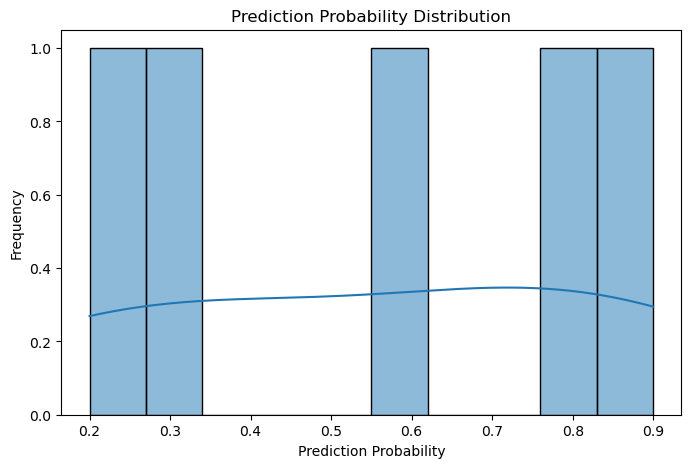

Confusion Matrix:
 [[2 1]
 [0 2]]


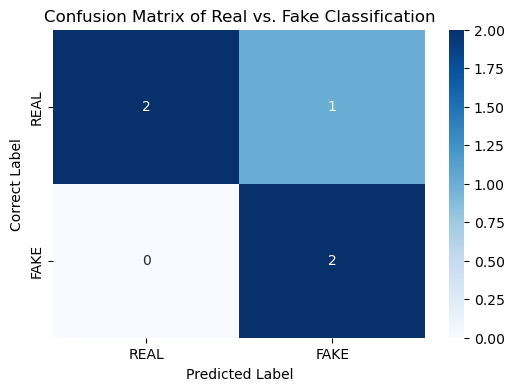

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define set_result() function
def set_result():
    """Initialize the result dictionary."""
    return {
        "video": {
            "pred": [],
            "pred_label": [],
            "correct_label": []
        }
    }

# Plotting functions
def plot_prediction_distribution(result):
    """Plot distribution of prediction values (probabilities)."""
    pred_values = result["video"]["pred"]

    # Ensure there are predictions to plot
    if len(pred_values) == 0:
        print("Error: No prediction values found to plot.")
        return

    plt.figure(figsize=(8, 5))
    sns.histplot(pred_values, bins=10, kde=True)
    plt.title("Prediction Probability Distribution")
    plt.xlabel("Prediction Probability")
    plt.ylabel("Frequency")
    plt.show()


def plot_confusion_matrix(result):
    """Plot confusion matrix based on correct and predicted labels."""
    if "correct_label" not in result["video"] or "pred_label" not in result["video"]:
        print("Error: Missing correct or predicted labels in the result.")
        return

    # Convert label lists into binary format for confusion matrix
    pred_labels = [1 if label == "FAKE" else 0 for label in result["video"]["pred_label"]]
    correct_labels = [1 if label == "FAKE" else 0 for label in result["video"]["correct_label"]]

    # Check if lists are populated and have matching lengths
    if len(pred_labels) == 0 or len(correct_labels) == 0:
        print("Error: No data in labels for plotting the confusion matrix.")
        return
    if len(pred_labels) != len(correct_labels):
        print("Error: Predicted and correct labels must have the same length.")
        return

    # Calculate and display the confusion matrix
    cm = confusion_matrix(correct_labels, pred_labels)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Correct Label")
    plt.title("Confusion Matrix of Real vs. Fake Classification")
    plt.show()


# Example of how to use the plotting functions
result = set_result()

# Sample result data for testing
# This should match the actual format of your stored results
result["video"]["pred"] = [0.2, 0.8, 0.6, 0.9, 0.3]
result["video"]["pred_label"] = ["REAL", "FAKE", "FAKE", "FAKE", "REAL"]
result["video"]["correct_label"] = ["REAL", "FAKE", "REAL", "FAKE", "REAL"]

# Plotting the data
plot_prediction_distribution(result)
plot_confusion_matrix(result)


In [81]:
pip install torch

  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
print(torch.__version__)


2.5.1+cpu


In [13]:
pip install torchvision


  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)


In [14]:
import torch
import torchvision.models as models
import numpy as np

# Load pre-trained model
model = models.resnet18(pretrained=True)
model.eval()  # Set to evaluation mode

# Example input batch (assuming inputs are images loaded from your dataloaders)
inputs = torch.randn(4, 3, 224, 224)  # Example: a batch of 4 RGB images with 224x224 size

# Pass the inputs through the model
model_output = model(inputs)  # Model output (logits)

# Get prediction probabilities
pred_probs = torch.softmax(model_output, dim=1).cpu().detach().numpy()

# Convert probabilities to predicted class labels
pred_labels = np.argmax(pred_probs, axis=1)

# Now you can use pred_probs and pred_labels for evaluation, plotting, etc.


C:\Users\VANSHIKA\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\VANSHIKA\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\VANSHIKA/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.44MB/s]


Model Output Type: <class 'torch.Tensor'>
Model Output Shape: torch.Size([3, 1000])


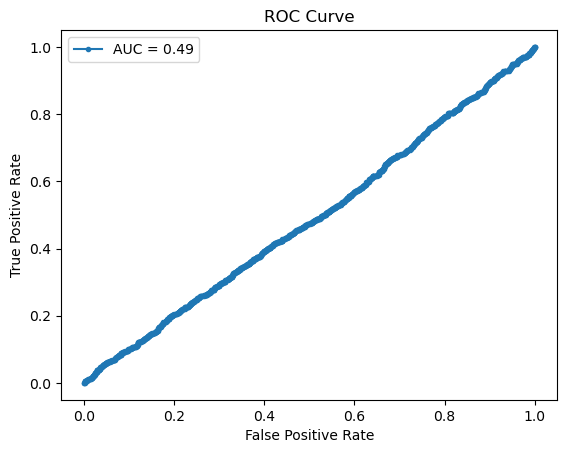

In [27]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Example input data (random input for testing)
input_data = torch.randn(3, 3, 224, 224)  # Batch of 3 images, each with 3 channels and size 224x224

# Assuming the model is already defined and loaded
model_output = model(input_data)  # Pass input data through the model

# Check the shape of model output to debug
print(f"Model Output Type: {type(model_output)}")
print(f"Model Output Shape: {model_output.shape}")

# If the model returns only one value, you don't need to unpack
if isinstance(model_output, tuple):
    # If it's a tuple, unpack the values
    model_output, x_hat = model_output
else:
    # If it's not a tuple, we just have one output
    x_hat = model_output

# Detach the tensor from the computation graph before converting to numpy
pred_probs = torch.sigmoid(model_output).detach().cpu().numpy()  # Get prediction probabilities

# Flatten the prediction probabilities and correct labels (if needed)
pred_probs = pred_probs.flatten()
correct_labels = torch.randint(0, 2, (pred_probs.shape[0],))  # Random binary labels for example
correct_labels = correct_labels.flatten()

# Now call the ROC curve function
def plot_roc_curve(pred_probs, correct_labels):
    fpr, tpr, _ = roc_curve(correct_labels, pred_probs)
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc_score(correct_labels, pred_probs):.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Call the plotting function (you can use pred_probs and correct_labels here)
plot_roc_curve(pred_probs, correct_labels)
